In [161]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [417]:
df = pd.read_csv("/content/drive/My Drive/ColabNotebooks/MachineLearning/NaiveBayes/adult.csv")

In [418]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [419]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [420]:
df = df.drop('race' ,axis = 1)

In [421]:
df = df.drop('marital-status',axis = 1)

In [422]:
df = df.drop('relationship',axis = 1)

In [423]:
df = df.drop('gender',axis = 1)

In [424]:
df = df.rename(columns={'native-country': 'country'})

In [425]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'occupation', 'capital-gain', 'capital-loss', 'hours-per-week',
       'country', 'income'],
      dtype='object')

In [426]:
len(df.columns)

11

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   occupation       48842 non-null  object
 6   capital-gain     48842 non-null  int64 
 7   capital-loss     48842 non-null  int64 
 8   hours-per-week   48842 non-null  int64 
 9   country          48842 non-null  object
 10  income           48842 non-null  object
dtypes: int64(6), object(5)
memory usage: 4.1+ MB


In [428]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [429]:
df.shape

(48842, 11)

In [430]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
occupation         0
capital-gain       0
capital-loss       0
hours-per-week     0
country            0
income             0
dtype: int64

#Check the duplicate values

In [431]:
df.duplicated().value_counts()

False    48756
True        86
dtype: int64

In [432]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,Machine-op-inspct,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Farming-fishing,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Protective-serv,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Machine-op-inspct,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,?,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Tech-support,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Machine-op-inspct,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Adm-clerical,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Adm-clerical,0,0,20,United-States,<=50K


In [433]:
df.shape

(48842, 11)

#Explore categorical variables

In [434]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['workclass', 'education', 'occupation', 'country', 'income']


In [435]:
df[categorical].head()

,workclass,education,occupation,country,income
0,Private,11th,Machine-op-inspct,United-States,<=50K
1,Private,HS-grad,Farming-fishing,United-States,<=50K
2,Local-gov,Assoc-acdm,Protective-serv,United-States,>50K
3,Private,Some-college,Machine-op-inspct,United-States,>50K
4,?,Some-college,?,United-States,<=50K


In [436]:

# check for cardinality in categorical variables
for var in categorical:   
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
occupation  contains  15  labels
country  contains  42  labels
income  contains  2  labels


#Frequency counts of categorical variables

In [437]:
for var in categorical:  
    print(df[var].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv 

In [438]:
# check labels in workclass variable
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [439]:

# check frequency distribution of values in workclass variable
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [440]:
# replace '?' values in workclass variable with `NaN`
df['workclass'].replace('?', np.NaN, inplace=True)

In [441]:
# again check the frequency distribution of values in workclass variable
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [442]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['workclass']=labelencoder.fit_transform(df['workclass'])
df['workclass'].unique()

array([3, 1, 8, 5, 0, 6, 4, 7, 2])

In [443]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['education']=labelencoder.fit_transform(df['education'])
df['education'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12, 10,  4,  8,  6,  2,  3, 13])

In [444]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder =  LabelEncoder() 
# df['marital-status']=labelencoder.fit_transform(df['marital-status'])
# df['marital-status'].unique()

In [445]:
# check labels in occupation variable
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [446]:
# replace '?' values in occupation variable with `NaN`
df['occupation'].replace('?', np.NaN, inplace=True)

In [447]:
# again check the frequency distribution of values in occupation variable
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [448]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['occupation']=labelencoder.fit_transform(df['occupation'])
df['occupation'].unique()

array([ 6,  4, 10, 14,  7,  9,  2,  0,  3, 12, 11,  8, 13,  5,  1])

In [449]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder =  LabelEncoder() 
# df['relationship']=labelencoder.fit_transform(df['relationship'])
# df['relationship'].unique()

In [450]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder =  LabelEncoder() 
# df['race']=labelencoder.fit_transform(df['race'])
# df['race'].unique()

In [451]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder =  LabelEncoder() 
# df['gender']=labelencoder.fit_transform(df['gender'])
# df['gender'].unique()

In [452]:
# check labels in native_country variable
df.country.unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [453]:
# check frequency distribution of values in country variable
df.country.value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [454]:
# replace '?' values in country variable with `NaN`
df['country'].replace('?', np.NaN, inplace=True)

In [455]:
# again check the frequency distribution of values in country variable
df.country.value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [456]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['country']=labelencoder.fit_transform(df['country'])
df['country'].unique()

array([38, 41, 28, 12, 25,  5, 20, 10, 29, 36, 13,  7, 32, 39, 34,  3, 23,
       18,  0, 30, 24,  8,  4, 35, 21,  1, 31,  2, 26, 15, 19, 33, 22,  6,
       40, 17, 16, 11, 37, 27,  9, 14])

In [457]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder() 
df['income']=labelencoder.fit_transform(df['income'])
df['income'].unique()

array([0, 1])

In [458]:
df.head()

,age,workclass,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,country,income
0,25,3,226802,1,7,6,0,0,40,38,0
1,38,3,89814,11,9,4,0,0,50,38,0
2,28,1,336951,7,12,10,0,0,40,38,1
3,44,3,160323,15,10,6,7688,0,40,38,1
4,18,8,103497,15,10,14,0,0,30,38,0


#Separate the Dependent and Independent Valiable

In [459]:
x= df.drop('income', axis = 1)
y= df['income']

In [460]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)

In [461]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((31747, 10), (17095, 10))

#Feature Engineering

In [462]:
# check data types in X_train
X_train.dtypes

age                int64
workclass          int64
fnlwgt             int64
education          int64
educational-num    int64
occupation         int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country            int64
dtype: object

In [463]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB   #GaussianNB is a type of Naive Bayes algorithm used for classification problems.
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [464]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

#Check accuracy score 

In [465]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7967


#Compare the train-set and test-set accuracy

In [466]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [467]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7941


#Check for overfitting and underfitting

In [468]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7941
Test set score: 0.7967


#Confusion matrix

In [469]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[12320   696]
 [ 2779  1300]]


In [470]:
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  12320

True Negatives(TN) =  1300

False Positives(FP) =  696

False Negatives(FN) =  2779


<Axes: >

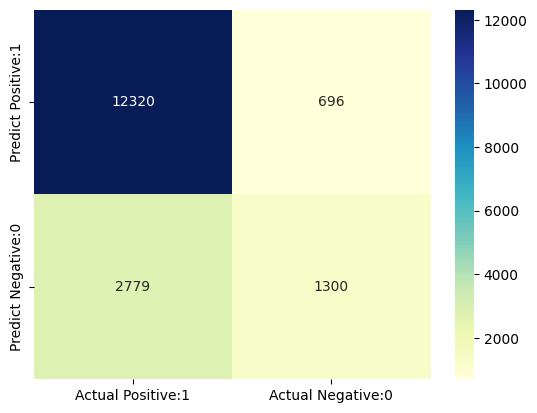

In [471]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices
It present the Classification report to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [472]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     13016
           1       0.65      0.32      0.43      4079

    accuracy                           0.80     17095
   macro avg       0.73      0.63      0.65     17095
weighted avg       0.78      0.80      0.77     17095



#Classification accuracy

In [473]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [474]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7967


#Classification error

In [475]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2033


#Precision
The percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.

In [476]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9465


#Recall/Sensitivity

In [477]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8159


#True Positive Rate
True Positive Rate is synonymous with Recall

In [478]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8159


# False Positive Rate

In [479]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3487


#Specificity

In [480]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6513
